<a href="https://colab.research.google.com/github/pratik-poudel/datacrunch/blob/main/28th%20march%20time%20series%20%2B%20AdaBoostRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import gc
# pd.options.display.float_format| = "{:.2f}".format
pd.options.display.max_columns = 500


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

import lightgbm as lgb

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'  
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv'
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv'

In [3]:
train = pd.read_csv(train_datalink_X)
target = pd.read_csv(train_datalink_y)
test = pd.read_csv(hackathon_data_link)

In [4]:
train = pd.concat([train, target], axis=1)

In [5]:
validation_data = train[13000: ]
train_data = train[:13000]

In [6]:
features = [f for f in train_data.columns if 'Feature' in f]
len(features)

14

In [7]:
train_data.shape

(13000, 17)

# TRAINING

In [8]:
def scorer(y_test, y_pred):
    score = (stats.spearmanr(y_test, y_pred))[0]
    # print('Score as calculated for the leader board (っಠ‿ಠ)っ {}'.format(score))
    return score

In [9]:
# train[:10][['Feature_1', 'target_r']]

In [10]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()   
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-3], sequences[end_ix-1, -3:]
        # print(seq_x)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [11]:
train_data_arr = np.array(train_data)
validation_data_arr = np.array(validation_data)

In [12]:
train_data_arr.shape, validation_data_arr.shape

((13000, 17), (1687, 17))

In [13]:
%matplotlib inline
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [14]:
# np.random.seed(60)
# df = []
# for i in range(1,30):
#     n_steps = i
#     X_train, y_train = split_sequences(train_data_arr, n_steps)
#     X_val, y_val = split_sequences(validation_data_arr, n_steps)

#     n_input = X_train.shape[1] * X_train.shape[2]
#     X_train = X_train.reshape((X_train.shape[0], n_input))
#     X_val = X_val.reshape((X_val.shape[0], n_input))

#     from keras.models import Sequential
#     from keras.layers import Dense


#     model = Sequential()
#     model.add(Dense(1024, activation='sigmoid', input_dim=n_input))
#     model.add(Dense(512, activation='relu'))
#     # model.add(Dense(256, activation='relu'))
#     model.add(Dense(150, activation='relu'))
#     # model.add(Dense(50, activation='relu'))
#     model.add(Dense(3))
#     model.compile(optimizer='rmsprop', loss='mse')

#     early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
#     mcp_save = ModelCheckpoint('./model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

#     batch_size = 64
#     epochs = 250

#     history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0, validation_data=(X_val, y_val), 
#                         callbacks=[early_stopping, mcp_save], shuffle=False)

    
#     # plot_metric(history, 'loss')
#     print( "TIME STEPS : --------> " , i)

#     model.load_weights('model.hdf5')
#     preds= model.predict(X_val, batch_size=batch_size)
#     cols = ['target_r', 'target_g', 'target_b']
#     preds = pd.DataFrame(preds, columns=cols)

#     scores = []
#     scores.append(n_steps)
#     scores.append(scorer(y_val[:, 0], preds.target_r))
#     scores.append(scorer(y_val[:, 1], preds.target_g))
#     scores.append(scorer(y_val[:, 2], preds.target_b))
#     df.append(pd.DataFrame(scores))

In [15]:
# df = pd.concat(df, axis=1)
# df.columns = df.iloc[0]
# df.drop(df.index[0], inplace=True)

In [16]:
# df.T

In [17]:
# df.T.max()

In [29]:
train = pd.read_csv(train_datalink_X)
target = pd.read_csv(train_datalink_y)
test = pd.read_csv(hackathon_data_link)

In [30]:
train = pd.concat([train, target], axis=1)

In [31]:
validation_data = train[13000: ]
train_data = train[:13000]

In [32]:
features = [f for f in train_data.columns if 'Feature' in f]
len(features)

14

In [33]:
validation_data.shape[0] - 6

1681

In [34]:
test_merge = validation_data[1682:]

In [35]:
cols = ['target_r', 'target_g', 'target_b']
test_merge.drop(columns=cols, inplace=True)

In [36]:
validation_data = validation_data[:1682]

In [37]:
train_data_arr = np.array(train_data)
validation_data_arr = np.array(validation_data)
validation_data_arr.shape

(1682, 17)

Epoch 00034: early stopping


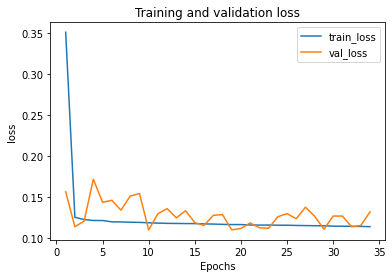

0.026464750145748745
0.09355211076002505
0.11827061113840846


In [38]:
np.random.seed(60)
n_steps = 6
X_train, y_train = split_sequences(train_data_arr, n_steps)
X_val, y_val = split_sequences(validation_data_arr, n_steps)

n_input = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], n_input))
X_val = X_val.reshape((X_val.shape[0], n_input))

from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(1024, activation='sigmoid', input_dim=n_input))
model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(3))
model.compile(optimizer='rmsprop', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mcp_save = ModelCheckpoint('./model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

batch_size = 64
epochs = 250

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, mcp_save], shuffle=True)


plot_metric(history, 'loss')

model.load_weights('model.hdf5')
preds= model.predict(X_val, batch_size=batch_size)
cols = ['target_r', 'target_g', 'target_b']
preds = pd.DataFrame(preds, columns=cols)

print(scorer(y_val[:, 0], preds.target_r))
print(scorer(y_val[:, 1], preds.target_g))
print(scorer(y_val[:, 2], preds.target_b))

In [39]:
test_data_with_lag = pd.concat([test_merge, test])
test_data_with_lag.shape

(14448, 14)

In [40]:
def split_sequences_for_prediction(sequences, n_steps):
    X= list()   
    for i in range(len(sequences)):
# find the end of this pattern
        end_ix = i + n_steps
# check if we are beyond the dataset
        if end_ix > len(sequences):
            break
# gather input and output parts of the pattern
        seq_x =sequences[i:end_ix]
        # print(seq_x)
        X.append(seq_x)
    return np.array(X)

In [41]:
preds_data = split_sequences_for_prediction(np.array(test_data_with_lag), 6)

In [42]:
preds_data.shape

(14443, 6, 14)

In [43]:
preds_data = preds_data.reshape((preds_data.shape[0], n_input))
preds_data.shape

(14443, 84)

In [44]:
prediction = pd.DataFrame(model.predict(preds_data, batch_size=batch_size))

In [45]:
prediction.columns = cols

In [46]:
prediction

,target_r,target_g,target_b
0,0.626972,0.640377,0.720730
1,0.608932,0.618129,0.700788
2,0.561535,0.548107,0.603757
3,0.557595,0.542370,0.596115
4,0.593016,0.594495,0.667984
...,...,...,...
14438,0.510495,0.477843,0.513263
14439,0.586274,0.584526,0.654207
14440,0.569906,0.560406,0.620916
14441,0.647605,0.643958,0.688672


# Other Models

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(train[features], train['target_b'], test_size=0.25, shuffle=False, random_state=60)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model_b = AdaBoostRegressor(random_state=60)
model_b.fit(X_train, y_train)
preds = model_b.predict(X_test)
scorer(preds, y_test)

0.19817358328052032

In [52]:
test = sc.transform(test)

In [53]:
prediction['target_b'] = model_b.predict(test)
prediction

,target_r,target_g,target_b
0,0.626972,0.640377,0.597933
1,0.608932,0.618129,0.432730
2,0.561535,0.548107,0.448555
3,0.557595,0.542370,0.432730
4,0.593016,0.594495,0.570312
...,...,...,...
14438,0.510495,0.477843,0.432730
14439,0.586274,0.584526,0.496716
14440,0.569906,0.560406,0.432730
14441,0.647605,0.643958,0.552260


In [54]:
prediction.describe()

,target_r,target_g,target_b
count,14443.000000,14443.000000,14443.000000
mean,0.589707,0.576980,0.475460
std,0.049312,0.063177,0.081547
min,0.429070,0.373711,0.262215
25%,0.555452,0.532862,0.432432
50%,0.589001,0.575914,0.432730
75%,0.621909,0.619073,0.545854
max,0.774284,0.828214,0.670515


# Predictions

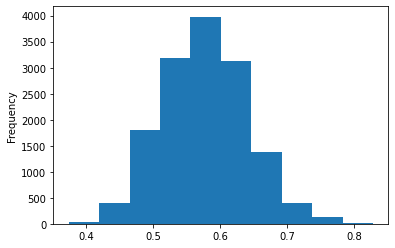

In [55]:
prediction['target_g'].plot(kind='hist')

In [56]:
API_KEY = "0GIskIC9Rd1I8sMw6nStutbIbMx7AaZzAyNfuMOVAVWgJtNa1IVQHZAD3WPj" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

Submission submitted :)


In [59]:
(12.53+4.12+3.93)/3 * 65

445.9